# هدف کلی
بهینه سازی ازدحام ذرات یا PSO یک الگوریتم بهینه سازی تصادفی مبتنی بر جمعیت است که به طور گسترده در حل مسائل بهینه سازی و جستجو استفاده میشه. همانطور که میدانیم این الگوریتم از رفتار اجتماعی و هوش جمعی دسته پرندگان یا ماهی ها الهام گرفته شده ست. در این الگوریتم، هر ذره نماینده یک راه حل است که در فضای جستجو حرکت میکند و پوزیشن و سرعت خود را بر اساس بهترین پوزیشن خود تا کنون و بهترین پوزیشن دسته، به روز میکند. 
حال در این مسئله میخواهیم x و y را طوری پیدا کنیم تا مقدار تابع ماکسیمم شود. 


# الگوریتم کلی
### ۱- مقدار دهی اولیه
اولین گام این است که جمعیت را با اندازه جمعیت معین مقداردهی کنیم. این کار با ایجاد لیستی از ذرات انجام می شود که در آن به هر ذره به طور تصادفی یک موقعیت و سرعت در فضای جستجو اختصاص داده می شود.

### ۲- محاسبه فیتنس
برای هر ذره در ازدحام، تناسب آن با استفاده از روش fitness_function() تعریف شده در کلاس Particle ارزیابی می شود. این روش ارزش تناسب ذره را بر اساس موقعیت آن در فضای جستجو محاسبه می کند.
### ۳-بروزرسانی بهترین موقعیت هر ذره
برای هر ذره در ازدحام، اگر مقدار فیتنس فعلی آن بهتر از بهترین فیتنس شناخته شده قبلی باشد، بهترین موقعیت شناخته شده آن به روز می شود.
### ۴- بروزرسانی بهترین موقعیت کل ذرات
بهترین موقعیت شناخته شده ازدحام با مقایسه مقدار فیتنس هر ذره با بهترین مقدار فیتنس شناخته شده قبلی ازدحام به روز می شود. اگر یک ذره فیتنس بهتری نسبت به بهترین فیتنس شناخته شده قبلی ازدحام داشته باشد، آنگاه بهترین موقعیت شناخته شده ازدحام به موقعیت آن ذره به روز می شود.
### ۵- بروزرسانی موقعیت و سرعت
سرعت و موقعیت هر ذره بر اساس بهترین موقعیت شناخته شده خود و شناخته شده ترین موقعیت ازدحام به روز می شود. این کار با استفاده از متد move() تعریف شده در کلاس ParticleSwarmOptimization انجام می شود. سرعت جدید بر اساس سرعت فعلی ذره، بهترین موقعیت شناخته شده خود و شناخته شده ترین موقعیت ازدحام محاسبه می شود. سپس موقعیت جدید با افزودن سرعت جدید به موقعیت فعلی ذره محاسبه می شود. سپس موقعیت برای اطمینان از باقی ماندن آن در فضای جستجو تنظیم می شود.
### ۶- تکرار مراحل ۲ تا ۵
مراحل 2-5 برای تعداد معینی از تکرارها یا تا زمانی که یک معیار خاتمه برآورده شود (مثلاً به مقدار فیتنس مورد نظر رسیده یا از حداکثر تعداد تکرارها فراتر رود) تکرار می شود.

# پیاده سازی
این کد از 2 کلاس تشکیل شده است - Particle و ParticleSwarmOptimization.

الگوریتم PSO پیاده سازی شده در این کد یک الگوریتم بهینه سازی قدرتمند است که می تواند برای حل طیف وسیعی از مسائل بهینه سازی مورد استفاده قرار گیرد. کلاس ParticleSwarmOptimization چارچوبی برای پیاده سازی الگوریتم PSO فراهم می کند، در حالی که کلاس Particle نشان دهنده تک تک ذرات در ازدحام است. تابع max_point() یک رابط برای اجرای الگوریتم PSO برای تعداد معینی از تکرارها فراهم می کند و موقعیت ذرات را در هر تکرار برمی گرداند. این کد را می توان به راحتی با تغییر متد fitness_function() در کلاس Particle برای حل سایر مسائل بهینه سازی تغییر داد.


### ابتدا کتابخانه هایی که نیاز داریم را ایمپورت میکنیم و ورودی را از کاربر میگیریم



In [61]:
import random
import numpy as np
from mpmath import mp


### کلاس ذرات:
این کلاس یک ذره را در فضای جستجو تعریف می کند. دارای 4 ویژگی است:
1. موقعیت: آرایه ای که موقعیت ذره را در فضای جستجو نشان می دهد.
2. سرعت: آرایه ای که نشان دهنده سرعت ذره در فضای جستجو است.
3. fitness: فیتنس ذره با استفاده از روش fitness_function() ارزیابی می شود.
4. best_position: شناخته شده ترین موقعیت ذره.
5. best_fitness: شناخته شده ترین فیتنس ذره.

fitness_function(): این متد مقدار برازندگی ذره را با استفاده از تابع تعریف شده در کلاس ارزیابی می کند.

In [62]:
class Particle:
    def __init__(self,position, velocity) -> None:
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.fitness = self.fitness_function()
        self.best_position = position
        self.best_fitness = self.fitness_function()

    def fitness_function(self):
        x, y = self.position
        e_val = mp.absmax(1-(mp.sqrt(x**2+y**2)/mp.pi))
        return mp.absmax(mp.sin(x)*mp.cos(y)*mp.exp(e_val))
    



### کلاس ParticleSwarmOptimization:
این کلاس مجموعه ای از ذرات را در فضای جستجو تعریف می کند. دارای 5 ویژگی است:
1. pop_size: اندازه ازدحام.
2. جمعیت: فهرستی از ذرات نشان دهنده ازدحام.
3. c1: عامل یادگیری برای شناخته شده ترین موقعیت ذره.
4. c2: عامل یادگیری برای شناخته شده ترین موقعیت ازدحام.
5. w: وزن اینرسی برای سرعت ذره.

#### توابع:
1. initial(): این تابع ازدحام را با موقعیت ها و سرعت های تصادفی برای هر ذره مقداردهی اولیه می کند.

2. fitness_function(particle): این تابع مقدار برازندگی ذره داده شده را با استفاده از متد fitness_function() تعریف شده در کلاس Particle ارزیابی می کند.

3. حرکت (ذره): این تابع موقعیت و سرعت ذره داده شده را بر اساس بهترین موقعیت شناخته شده خود، شناخته شده ترین موقعیت دسته و وزن اینرسی به روز می کند. همچنین شناخته شده ترین موقعیت و فیتنس ذره و شناخته شده ترین موقعیت و فیتنس ازدحام را به روز می کند.

تابع max_point() :
این تابع یک نمونه از کلاس ParticleSwarmOptimization و تعداد تکرارها را برای اجرا به عنوان ورودی می گیرد. متد ()initicial کلاس ParticleSwarmOptimization را برای مقداردهی اولیه ازدحام فراخوانی می کند و سپس متد ()next_iteration را برای تعداد تکرار معین اجرا می کند. همچنین شناخته شده ترین  فیتنس و موقعیت ازدحام را در هر تکرار چاپ می کند. در نهایت، موقعیت ذرات را در هر تکرار برمی‌گرداند.



In [63]:
class ParticleSwarmOptimization:
    def __init__(self,pop_size,c1,c2,w) -> None:
        # First we set our constants:
        self.pop_size = pop_size
        self.c1 = c1
        self.c2 = c2
        self.w = w
        #  Then we set our variable Arrays and values:
        self.population = []
        self.swarm_best_fitness = 0
        self.swarm_best_position = [0,0]
    def initial(self):
        # Set the inital population
        for i in range(self.pop_size):
            x, y, v1, v2 = [np.random.choice([-1, 1])*np.random.rand()*10 for _ in range(4)]
            self.population.append(Particle((x, y), (v1, v2)))

    def fitness_function(self,particle:Particle):
        return particle.fitness_function()
    
    def move(self,particle:Particle):
        inertia = self.w*(particle.velocity % 10)
        particle_best = self.c1*np.random.rand()*(particle.best_position-particle.position)
        swarm_best = self.c2*np.random.rand()*(self.swarm_best_position-particle.position)

        new_v = inertia+particle_best+swarm_best
        particle.position = particle.position+new_v
        particle.velocity = new_v

        x, y = particle.position
        x = (x+10)%20 -10
        y = (y+10)%20 -10

        particle.position = np.array([x, y])
        particle.fitness = particle.fitness_function()
        
        if (particle.fitness > particle.best_fitness):
            particle.best_fitness = particle.fitness
            particle.best_position = particle.position

        if (particle.fitness > self.swarm_best_fitness):
            self.swarm_best_fitness = particle.fitness
            self.swarm_best_position = particle.position

        return particle
    
    def next_iteration(self):
        for particle in self.population:
            self.move(particle)



## تابع کلی الگوریتم
برای راحتی کار و قابل استفاده بودن الگوریتم، یک تابع مینویسیم که یک شی از کلاس الگوریتم ما ساخته، یک بریک پوینت  میگیرد، که الگوریتم را برای ما تا برقراری آن شرایط اجرا میکند.
همچنین نسل ها را در یک ارایه ذخیره کرده و در نسل را در یک ارایه میریزیم تا در صورت خواستن کشیدن نمودار، بتوانیم از آن ها استفاده کنیم. به علاوه، بهترین جواب تا نسلی که در ان هستیم را نیز چاپ میکنیم.

In [64]:
def max_point(swarm: ParticleSwarmOptimization, stop_gen=100):

    swarm = swarm
    swarm.initial()
    ith_gen = 0
    iteration_x = []
    iteration_y = []
    while ith_gen<stop_gen:
        swarm.next_iteration()
        if (ith_gen % 1 == 0):
            iteration_x.append(np.array([particle.position[0] for particle in swarm.population]))
            iteration_y.append(np.array([particle.position[1] for particle in swarm.population]))
            print(f'In ietration {ith_gen}th best fitness is:{swarm.swarm_best_fitness}, and best position is:{swarm.swarm_best_position}')
            ith_gen+=1

    print('----------------------------------------')
    print(
        f"maximization problem solved in iteration {ith_gen}th with population of{swarm.pop_size}. And best fitness is: {swarm.swarm_best_fitness}, and best position is:{swarm.swarm_best_position}")
    print('----------------------------------------')
    return (iteration_x, iteration_y)


In [65]:
mp.dps = 20
test = ParticleSwarmOptimization(pop_size=60,c1=0.8,c2=1.5,w=0.005)
x_set, y_set = max_point(test,20)

In ietration 0th best fitness is:19.064466073708600344, and best position is:[-7.94716165 -9.60987186]
In ietration 1th best fitness is:19.159650456798707587, and best position is:[-7.9869788 -9.6844199]
In ietration 2th best fitness is:19.190505940228448208, and best position is:[-8.03153471 -9.70009256]
In ietration 3th best fitness is:19.190505940228448208, and best position is:[-8.03153471 -9.70009256]
In ietration 4th best fitness is:19.206895359636606875, and best position is:[-8.04657617 -9.65520921]
In ietration 5th best fitness is:19.207604611189975612, and best position is:[-8.04823468 -9.65802946]
In ietration 6th best fitness is:19.208483196772109506, and best position is:[-8.05362629 -9.66472024]
In ietration 7th best fitness is:19.208483196772109506, and best position is:[-8.05362629 -9.66472024]
In ietration 8th best fitness is:19.208483196772109506, and best position is:[-8.05362629 -9.66472024]
In ietration 9th best fitness is:19.208483196772109506, and best position i

# تحلیل
پس از بالا و پایین کردن مقادر مختلف c1 و c2 و w به مقادیر نوشته شده میرسیم. الگوریتم در زمان خیلی خوب و در نسل خیلی خوبی جواب را پیدا میکند. برای چاپ نمودار، موقعیت ذرات را در هر تکرار ذخیره کردم، و در نهایت آن ها را با استفاده از نمودار نقطه چاپ کردم. نکته قابل توجه در پیاده سازی این نمودار این است که نسل های اولی با رنگ کمرنگ تر و نسل های اخری با رنگ پررنگ تر برای تحلیل بیشتر نمایش داده شده اند.

/tmp/ipykernel_21455/2132620709.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


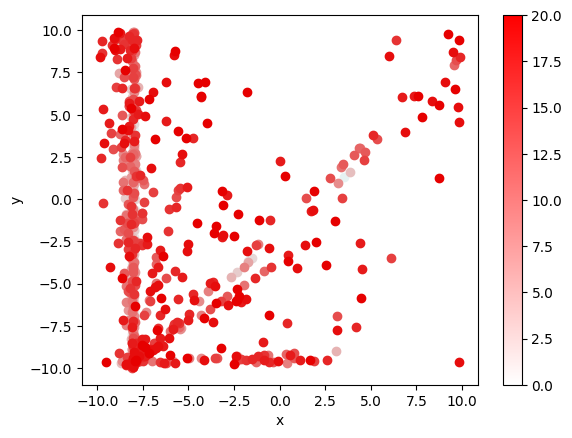

In [66]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
for i in range(19,-1,-1):
    plt.scatter(x_set[i],y_set[i],color=(0.9,i/20,i/20))
plt.xlabel("x")
plt.ylabel("y")
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', ['white', 'red'])
norm = mcolors.Normalize(vmin=0, vmax=20)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.show()